In [84]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [85]:
def plot_normal_ecdf(n):
    sorted_z = np.sort(stats.norm.rvs(size=n))
    zmin = sorted_z[0]
    zmax = sorted_z[-1]
    
    # Staircase coordinates (z0, 0), (z0, 1/n), (z1, 1/n), (z1, 2/n), ..., (zn-1, 1)
    # x_steps: Repeat each z-value twice
    x_steps = np.repeat(sorted_z, 2)
    
    # y_steps: starts at 0, repeat each probability level twice, ends at 1
    # Probability levels [0/n, 1/n, 2/n, ..., n/n]
    probs = np.arange(0, n + 1) / n
    y_steps = np.repeat(probs, 2)[1:-1]

    plt.figure(figsize=(6, 4))
    plt.xlim(-4, 4)
    plt.ylim(-0.05, 1.05)
    
    plt.plot(x_steps, y_steps, color='red', lw=2, label='Empirical CDF')
    plt.plot([zmax, 4], [1, 1], color='red', lw=2)
    plt.plot([-4, zmin], [0, 0], color='red', lw=2) 

    x_ref = np.arange(-4, 4.1, 0.1)
    plt.plot(x_ref, stats.norm.cdf(x_ref), lw=2, color='darkblue', label='Standard Normal CDF')

    plt.legend(fontsize=10)
    plt.title(f'Empirical CDF of {n} IID Standard Normals', size=12);

In [86]:
def ks_plot(x_interval, sample, null_cdf):
    xmin = x_interval[0]
    xmax = x_interval[1]
    n=len(sample)
    sorted_sample = np.sort(sample)
    plt.step(sorted_sample, np.arange(1, n+1)/n, where='post', lw=2, color='red', label='Empirical CDF of Sample')
    if sorted_sample.item(0) > xmin:
        plt.plot((xmin, sorted_sample.item(0), sorted_sample.item(0)), (0, 0, 1/n), lw=2, color='red')
    if sorted_sample.item(n-1) < xmax:
        plt.plot((sorted_sample.item(n-1), xmax), (1, 1), lw=2, color='red')
    x = np.arange(xmin, xmax+0.1, 0.1)
    plt.plot(x, null_cdf(x), lw=2, color='darkblue', label='Null CDF')
    plt.title(f'Sample Size {n}', size=12)
    plt.legend(fontsize=10);

In [87]:
def ks2_plot(x_interval, sample1, sample2):
    xmin = x_interval[0]
    xmax = x_interval[1]
    n=len(sample1)
    sorted_sample1 = np.sort(sample1)
    plt.step(sorted_sample1, np.arange(1, n+1)/n, where='post', lw=2, color='red', label='ECDF of Sample X')
    if sorted_sample1.item(0) > xmin:
        plt.plot((xmin, sorted_sample1.item(0), sorted_sample1.item(0)), (0, 0, 1/n), lw=2, color='red')
    if sorted_sample1.item(n-1) < xmax:
        plt.plot((sorted_sample1.item(n-1), xmax), (1, 1), lw=2, color='red')
    m = len(sample2)
    sorted_sample2 = np.sort(sample2)
    plt.step(sorted_sample2, np.arange(1, m+1)/m, where='post', lw=2, color='darkblue', label='ECDF of Sample Y')
    if sorted_sample2.item(0) > xmin:
        plt.plot((xmin, sorted_sample2.item(0), sorted_sample2.item(0)), (0, 0, 1/m), lw=2, color='darkblue')
    if sorted_sample2.item(m-1) < xmax:
        plt.plot((sorted_sample2.item(m-1), xmax), (1, 1), lw=2, color='darkblue')
    plt.legend()
    plt.title(f'n = {n}, m = {m}', size=12);

# Lecture 11: The Empirical CDF and Kolmogorov-Smirnov Tests

**Data 145, Spring 2026: Evidence and Uncertainty**  

**Instructors:** Ani Adhikari, William Fithian

---

**Please run all the code cells above before you start reading.** 

---

## Goodness of Fit
That's statistics language for how well the data and the model fit each other. In Data 8 you tested whether the data come from a specified multinomial distribution. The null hypothesis was that the model was good, and the alternative was that the model wasn't good. The test statistic was the total variation distance (TVD) between the distribution of the sample and the specified multinomial. You generated data under the specified null distribution to simulate the TVD under the null hypothesis. Large values of the observed TVD were evidence in favor of the alternative. 

This method allows us to test whether our i.i.d. data come from any completely specified underlying distribution with a finite number of possible values. We will now develop a method to test whether or not an i.i.d. sample is drawn from a specified distribution with a continuous increasing cdf.

This will allow us to test if our data are drawn from the standard normal distribution, for example. Later in the lecture we will discuss modifications for testing whether the data are drawn from a distribution family with the parameters unspecified.

Let $X_1, X_2, \ldots, X_n$ be an i.i.d. sample with underlying cdf $F_X$. Let $F$ be the continuous, increasing cdf of a completely specified distribution (no unknown parameters, for now). Our hypotheses:
- $H_0$: $F_X = F$
- $H_1$: $F_X \ne F$

---

## 1. Kolmogorov-Smirnov Statistic

A good approach is to see how the empirical cdf of the data differs from $F$. Recall the definition of the empirical cdf of the data:
$$
F_n(x) = \frac{1}{n}\sum_{i=1}^{n} I(X_i \le x) ~~~~~~~~~ \text{ for all } x
$$
For each fixed $x$, $F_n(x)$ is the proportion of data points that are at or below $x$. 

The **Kolmogorov-Smirnov test statistic** is the *biggest difference between $F_n$ and $F$ over all points $x$*:

$$D_n = \sup_{x\in \mathbb{R}}|F_n(x) - F(x)|$$

Here $\sup$ stands for *supremum*. That's like a maximum taken over the entire real line. In general, such a "maximum" need not be attained. However, since $F$ is increasing, the largest difference between $F$ and $F_n$ must occur at one of the jumps of $F_n$. Therefore the supremum is actually a maximum of $n$ values.

You can see this in the figure below from the previous lecture. It shows the ecdf of 10 i.i.d. standard normal variables. The blue curve is the standard normal cdf $\Phi$. The supremum of the vertical distances between the two graphs is attained at a jump.

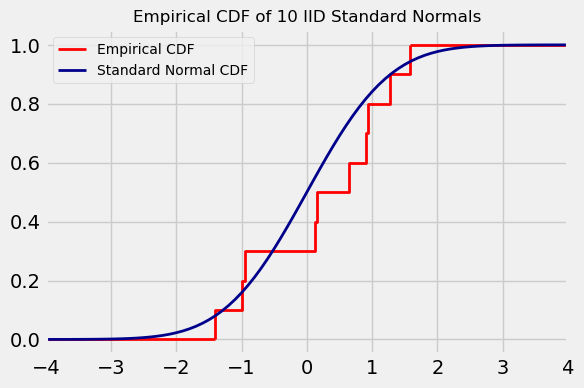

In [88]:
plot_normal_ecdf(10)

Under the null, $F_n$ should approximate $F$ if $n$ is large. So $D_n$ should become smaller if $n$ gets larger. This should be believable though its formal proof is technical and beyond our scope.

Compare the figures above and below to see what happens as the sample size increases. 

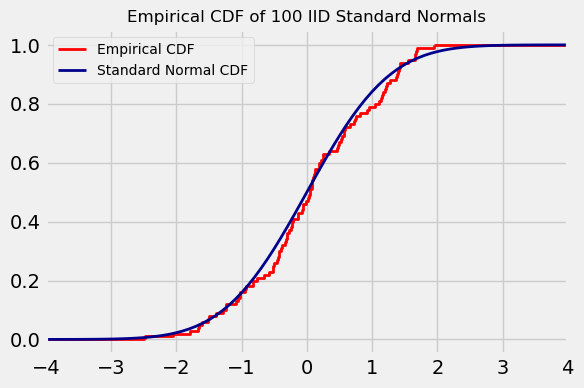

In [89]:
plot_normal_ecdf(100)

We have discovered that $D_n$ is easy to calculate. So let's calculate it. More conveniently, let's eyeball it and compare with the value calculated by Python's `kstest` function.

In the figure below, the data are i.i.d. exponential $(1/2)$ whereas the hypothesized distribution is gamma $(2, 1)$. Both have mean $2$ but they are different distributions.

In [90]:
def gamma_2_1_cdf(x):
    """Returns the gamma (2, 1) cdf at x"""
    return stats.gamma.cdf(x, a=2, scale=1)

KS statistic:  0.14343969416510155


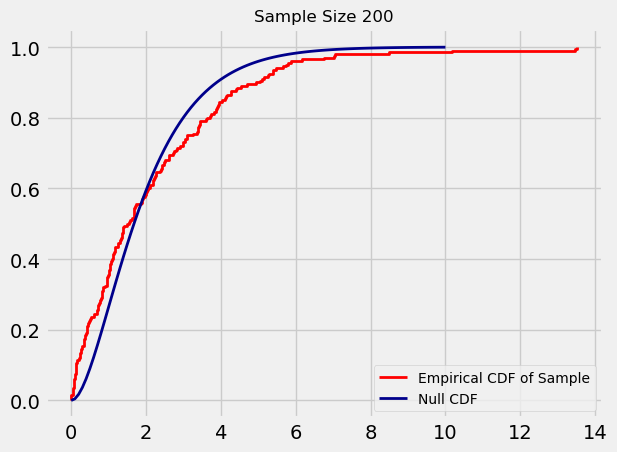

In [91]:
expon_new_200 = stats.expon.rvs(size=200, scale=2) # sample iid exponential (1/2)

ks_plot([0, 10], expon_new_200, gamma_2_1_cdf) # (x-interval, sample, F)

print('KS statistic: ', stats.kstest(expon_new_200, gamma_2_1_cdf).statistic)

---
## 2. Null Distribution of the Kolmogorov-Smirnov Statistic

The definition $D_n = \sup_{x\in \mathbb{R}}|F_n(x) - F(x)|$ appears to indicate that the null distribution of $D_n$ depends on exactly which $F$ is specified in $H_0$. 

But it's fortunate that in this case appearances are deceptive. We will now see how the null distribution of $D_n$ does not depend on $F$ at all!

Before we do that, take a moment to think about what this result means. It tells us that whether we are trying to see if our data are standard normal or exponential $(1/2)$, the null distribution of the Kolmogorov-Smirnov test statistic is the same. It depends only on the sample size. We don't need to work out one distribution when the null specifies the standard normal, another distribution when the null specifies exponential $(1/2)$, and so on.

The key observation is that we are looking at the biggest difference between pairs of probabilities. All the action is on the unit interval. We will use that to our advantage.

In everything that follows, keep in mind that we are working under $H_0$.

Under this assumption, our sample $X_1, X_2, \ldots, X_n$ is i.i.d. $F$. The sample is defined on some probability space about which we don't know anything. To study the null distribution of $D_n$, we will construct another sequence $X_1^*, X_2^*, \ldots, X_n^*$ on a different probability space so that $X_1^*, X_2^*, \ldots, X_n^*$ is i.i.d. $F$ (just like our sample) and the new space is such that we can see how $D_n^*$ behaves.

If $(X_1, X_2, \ldots, X_n) \stackrel{d}{=} (X_1^*, X_2^*, \ldots, X_n^*)$, then $D_n \stackrel{d}{=} D_n^*$. So let's construct the new sample and study $D_n^*$.

- Since $F$ is continuous and increasing, $F^{-1}$ exists.
- Take a space on which you have random variables $U_1, U_2, ...$ i.i.d. uniform $(0,1)$. For $i \ge 1$ let $X_i^* = F^{-1}(U_i)$. 
- Recall from your probability class that $X_i^*$ has cdf $F$. The $X_i^*$s are independent of each other since the $U_i$'s are independent of each other. Thus $X_1^*, X_2^*, \ldots, X_n^*$ are i.i.d. $F$.

Now define
$$
D_n^* = \sup_{x \in \mathbb{R}} \vert F_n^*(x) - F(x)| ~~~ \text{ where } ~~~
F_n^*(x) = \frac{1}{n} \sum_{i=1}^n I(X_i^* \le x)
$$

Since $F$ is increasing, $X_i^* \le x \iff F(X_i^*) \le F(x)$. By the definition of $X_i^*$ we have $F(X_i^*) = U_i$. Therefore

$$
F_n^*(x) ~=~ \frac{1}{n} \sum_{i=1}^n I(X_i^* \le x)
~=~ \frac{1}{n} \sum_{i=1}^n I(F(X_i^*) \le F(x))
~=~ \frac{1}{n} \sum_{i=1}^n I(U_i \le F(x)) ~=~ G_n(F(x))
$$
where $G_n$ is the empirical cdf of $U_1, U_2, \ldots, U_n$. Thus

$$
\begin{align*}
D_n^* &= \sup_{x \in \mathbb{R}} \vert F_n^*(x) - F(x)| \\
&= \sup_{x \in \mathbb{R}} \vert G_n(F(x)) - F(x) \vert \\
&= \sup_{0 \le u \le 1} |G_n(u)-u|
\end{align*}
$$

The last step above follows because as $x$ ranges over all of $\mathbb{R}$, $F(x)$ ranges over the unit interval.

Thus $D_n^* = \sup_{0 \le u \le 1} |G_n(u)-u|$ which doesn't involve $F$.

---
## 3. One-Sample Kolmogorov-Smirnov Test

Back to our original sample $X_1, X_2, \ldots, X_n$: We have an observed value of the test statistic $D_n$.

Under $H_0$, we have $D_n \stackrel{d}{=} \sup_{0 \le u \le 1} |G_n(u)-u|$ where $G_n$ is the empirical cdf of $n$ i.i.d. uniform $(0, 1)$ random variables.

To find the $p$-value, we have to compare this distribution and our observed value of $D_n$.

We have a few options for finding the distribution.

- By probability theory: Take Stat 205. The null distribution of $\sqrt{n}D_n$ converges to what is known as the Kolmogorov distribution. It is related to Brownian motion and doesn't depend on $F$.
- By Python: See the cell below for the output of `kstest` to our earlier example of exponential $(1/2)$ data and a hypothesized distribution of gamma $(2, 1)$. You saw the observed value of the statistic already. Now you have a $p$-value as well.

In [92]:
stats.kstest(expon_new_200, gamma_2_1_cdf) # sample size 200

KstestResult(statistic=0.14343969416510155, pvalue=0.0004704505512969345, statistic_location=0.4363665360223888, statistic_sign=1)

Less mysteriously, let's use simulation.
- Do the following repeatedly and plot the histogram of the results:
    - Draw $n$ times independently from the uniform $(0, 1)$ distribution and calculate the resulting value of $\sup_{0 \le u \le 1} |G_n(u)-u|$.

In [93]:
def one_simulated_D(n):
    """Returns one value of D_n"""
    order_stats = np.sort(stats.uniform.rvs(size=n))
    return max(np.append(np.abs(order_stats - np.arange(0, n)/n), np.abs(order_stats - np.arange(1, n+1)/n)))

def simulate_D(n, repetitions):
    """Returns array of length repetitions. 
    Items are i.i.d. replications of D_n."""
    ksd = np.array([])
    for i in range(repetitions):
       ksd = np.append(ksd, one_simulated_D(n))
    return ksd

In [94]:
simulate_D(10, 5) # 5 i.i.d. values of D_10

array([0.33979892, 0.20673887, 0.2425362 , 0.20167478, 0.31572153])

In [95]:
def plot_ksd(n, repetitions):
    distances = simulate_D(n, repetitions)
    plt.figure(figsize=(5, 4))
    plt.hist(distances, density=True, bins=50, color='tab:blue', edgecolor='w')
    plt.title(f'Null Distribution of KS Distance, n = {n}', size=12);

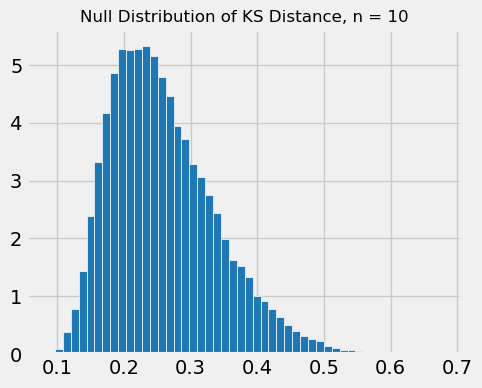

In [96]:
plot_ksd(10, 50000)

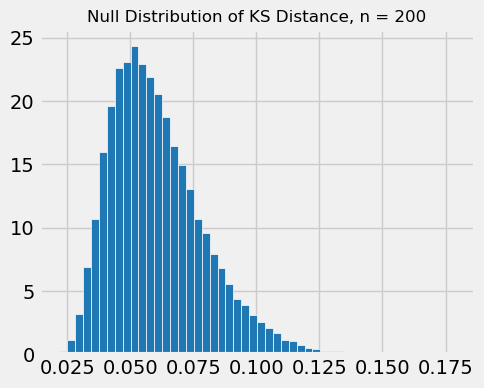

In [97]:
plot_ksd(200, 50000)

Earlier in this section, we (or rather, `kstest`) calculated a KS distance of roughly $0.14$ based on a sample of size $200$. The $p$-value was very small, about $0.0005$. That is consistent with the figure above, which shows the null distribution of the KS statistic for a sample of size 200.

Compare the two distributions. The shapes are similar but the one for the larger sample size is squeezed into a much smaller interval of probable values.

---
## 4. KS Test for a Distribution with an Unknown Parameter
The Kolmogorov-Smirnov test has two variants that are frequently used.

First, suppose you want to test whether an i.i.d. sample is drawn from an exponential distribution but you don't know the rate $\lambda$. Or perhaps you want to test whether your sample is i.i.d. normal $(\mu, 1)$.

That is, suppose you are testing $H_0: F_X = F_\theta$ where $\theta$ is an unknown numerical parameter.

Then the test developed above doesn't quite work because you don't completely know the hypthesized underlying distribution.

But you can start by estimating $\theta$, usually by its MLE $\hat{\theta}$. Then find the KS distance between the ecdf of the sample and the estimated "true" cdf $F_{\hat{\theta}}$. That is your observed statistic.

So far so good. What breaks down, however, is the null distribution of $D_n$ of the previous section. Since you have estimated $\hat{\theta}$ based on the sample, the KS distance between the ecdf of the sample and $F_{\hat{\theta}}$ is likely to be smaller than if $F_{\hat{\theta}}$ did not involve the sample.

Also, the null distribution of this new KS distance is not distribution free. For some underlying distribution families including the normal and the exponential, the null distribution is known analytically or has been tabulated. 

A simpler way to estimate the null distribution is by the parametric bootstrap, repeating the following many times as you will in this week's worksheet.
- The simulation is under the null hypothesis. So generate a new sample from $F_{\hat{\theta}}$.
- Estimate $\theta$ again from this sample, and let the corresponding $F$ be your new "true" distribution.
- Calculate the KS distance between the ecdf of the new sample and the new "true" $F$.

---
## 5. Two-Sample KS Test

Perhaps the most common application of the Kolmogorov-Smirnov method is to test whether two independent samples are from the same underlying distribution (with a continuous and increasing cdf).

Let $X_1, X_2, \ldots, X_n$ be i.i.d. from $F$. Independent of the $X$ sample, let $Y_1, Y_2, \ldots, Y_m$ be i.i.d. $G$. The goal is to test the null hypothesis $H_0: ~ F = G$.

Let $F_n$ be the empirical cdf of the $X$ sample, and let $G_m$ be the empirical cdf of the $Y$ sample. Define the new KS distance
$$
D_{n, m} = \sup_{x \in \mathbb{R}} \vert F_n(x) - G_m(x) \vert
$$
In graphical terms this is the largest vertical distance between the two empirical cdfs. It is called the two-sample Kolmogorov-Smirnov test statistic.

In [98]:
sample_X = stats.expon.rvs(size=10, scale=2)      # exponential (1/2)
sample_Y = stats.gamma.rvs(size=15, a=2, scale=1) # gamma (2, 1)

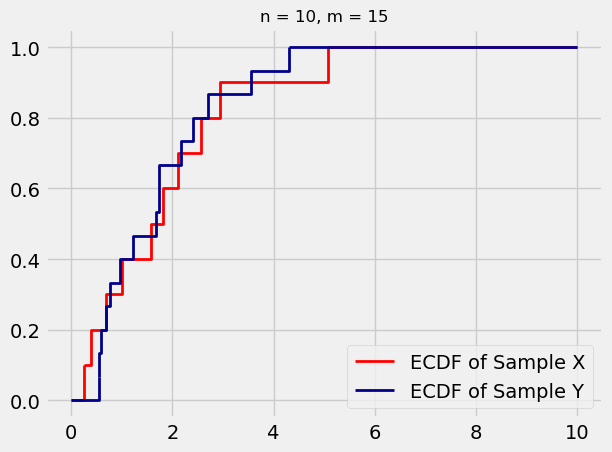

In [99]:
ks2_plot([0, 10], sample_X, sample_Y)

The supremum is attained at one of the $n+m$ jumps.

**Distribution Free:** Under $H_0$, the pooled sample is i.i.d. of size $n+m$  Given this, the $X$ sample is a simple random sample of size $n$ from the $n+m$ pooled values. So the null distribution of $D_{n, m}$ is the same regardless of the common underlying distribution.

As $n$ and $m$ both get large, the distribution of $\displaystyle \sqrt{\frac{nm}{n+m}}D_{n,m}$ approaches the Kolmogorov distribution. The SciPy test is `ks_2samp`.